In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np

### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

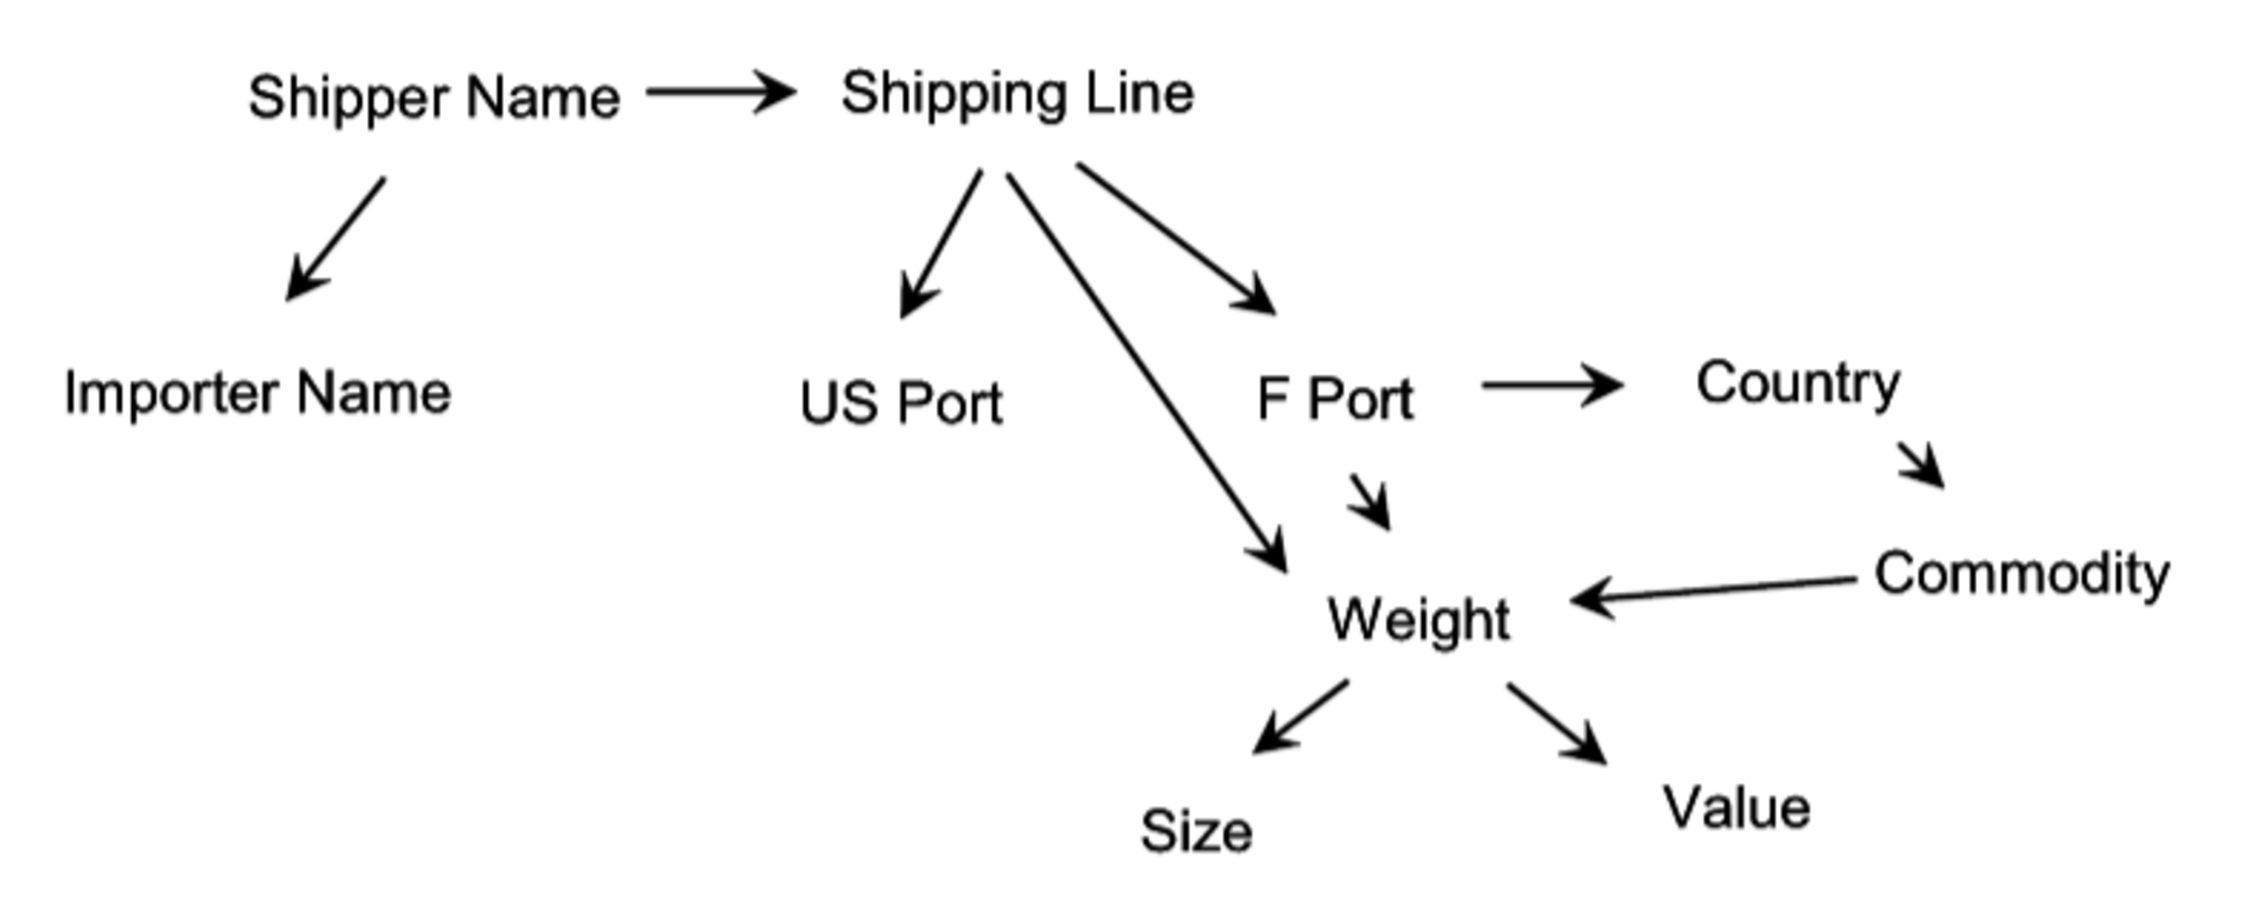

In [2]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?

CI (Shipper Name, Value | Shipping Line)? 

CI (Foreign Port, Commodity | Country)? 

CI (Foreign Port, Commodity | County, Weight)? 

### each node is conditionally independent of all its non-descendants in the tree, given its parents.

CI (Shipper Name, Value | F Port) - Conditionally Dependent

CI (Shipper Name, Value | Shipping Line) -  Conditionally Independent

CI (Foreign Port, Commodity | Country) -  Conditionally Independent

CI (Foreign Port, Commodity | County, Weight) - Conditionally Dependent

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (80%), Los Angeles (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO - 

b) A heavy package shipped from Vancouver to Seattle by CSCO - 

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

### a) A heavy package shipped from Vancouver to Seattle by ASCO - 

Pr(ASCO, Vancouver, Seattle, Heavy) =
Pr(ASCO)* Pr(Seattle | ASCO) * Pr(Vancouver | ASCO) * Pr(Heavy | Vancouver, ASCO) = 
0.3 * 1 * 1 * 0.15 =
0.045

### b) A heavy package shipped from Vancouver to Seattle by CSCO - 

Pr(CSCO, Vancouver, Seattle, Heavy) =
Pr(CSCO)* Pr(Seattle | CSCO) * Pr(Vancouver | CSCO) * Pr(Heavy | Vancouver, CSCO) = 
0.7 * 0.8 * 0.6 * 0.2 =
0.0672

### c) A heavy package shipped from Yokohama to Los Angeles by CSCO

Pr(CSCO, Yokohama, Los Angeles, Heavy) =
Pr(CSCO)* Pr(Los Angeles | CSCO) * Pr(Yokohama | CSCO) * Pr(Heavy | Yokohama, CSCO) = 
0.7 * 0.2 * 0.4 * 0.6 =
0.0336


Therefore since C has the lowest likelihood, it is the most anomalous.

### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [3]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,0,0,0,1,0,1
2,1,1,0,1,1,1
3,1,0,0,1,1,1
4,2,0,1,0,1,1


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

### a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)


In [4]:
#import all necessary packages and estimators
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.factors.discrete import TabularCPD

#Hill Climb Search using BicScore method to get the structure of the model
hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate()
print(best_model.edges())

ImportError: cannot import name 'BDeuScore' from 'pgmpy.estimators.BDeuScore' (//anaconda3/lib/python3.7/site-packages/pgmpy/estimators/BDeuScore.py)

### b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)


In [ ]:
hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = BayesianModel(hc.estimate().edges()) # convert DAG to BayesianModel
print(best_model.edges())

In [ ]:
#fit and visualize the model
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

### c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

In [ ]:
#in sample prediction
train_x = train.loc[:,["B","D", "E"]]
predicted_train = best_model.predict(train_x)
print("In sample:",(train.loc[:,'A'].reset_index(drop=True)==predicted_train['A']).mean())

#out of sample prediction
test_x = test.loc[:,["B","D", "E"]]
predicted_test = best_model.predict(test_x)
print("Out of sample:",(test.loc[:,'A'].reset_index(drop=True)==predicted_test['A']).mean())

### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [5]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [6]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


In [7]:
#get the columns we want to cluster on
hours = data3[['hour_0', 'hour_1','hour_2', 'hour_3','hour_4', 'hour_5','hour_6', 'hour_7','hour_8', 'hour_9','hour_10', 'hour_11','hour_12', 'hour_13','hour_14', 'hour_15','hour_16', 'hour_17','hour_18', 'hour_19','hour_20', 'hour_21','hour_22', 'hour_23']]
hours.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.045000,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.029412,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235


In [8]:
#make 3 clusters based on the data above
from sklearn.cluster import KMeans
km = KMeans(random_state=999,n_clusters=3)
res=km.fit(hours)

In [9]:
#cluster labels
res.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1,
       2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [10]:
clust={data3.index[i]:res.labels_[i] for i in range(len(res.labels_))}

In [11]:
clust

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 1,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 1,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 1,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 1,
 37: 1,
 38: 1,
 39: 2,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 0,
 47: 0,
 48: 2,
 49: 0,
 50: 2,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 1,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 0,
 62: 2,
 63: 2,
 64: 0,
 65: 2,
 66: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 1,
 72: 0,
 73: 0,
 74: 1,
 75: 1,
 76: 0,
 77: 2,
 78: 2,
 79: 1,
 80: 1,
 81: 2,
 82: 1,
 83: 1,
 84: 0,
 85: 0,
 86: 2,
 87: 1,
 88: 2,
 89: 1,
 90: 0,
 91: 0,
 92: 2,
 93: 1,
 94: 2,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 1,
 107: 0,
 108: 0,
 109: 1,
 110: 1,
 111: 0,
 112: 0,
 113: 0,
 114: 1,
 115: 0,
 116: 0,
 117: 0,
 118: 0}

In [12]:
rr=pd.DataFrame({'index':data3.index, 'label':res.labels_})

In [13]:
rr.head()

,index,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [14]:
#merge cluster labels to original data
data3_ = data3.merge(rr, how = 'outer', left_index = True, right_index = True)
data3_.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,index,label
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,1,0
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152,2,0
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000,3,0
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000,4,0


In [15]:
data3_.drop(['index'], axis = 1)

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,label
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,0
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152,0
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000,0
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,THEFT: RETAIL THEFT,P1P,0.119700,0.143231,0.140389,0.144367,0.147209,0.153007,0.152097,0.008185,...,0.016824,0.008185,0.018415,0.001591,0.007389,0.002160,0.008980,0.003069,0.020462,1
115,WEAPONS VIOLATION: RECKLESS FIREARM DISCHARGE,P2,0.180672,0.096639,0.147059,0.092437,0.138655,0.142857,0.201681,0.054622,...,0.016807,0.004202,0.012605,0.004202,0.000000,0.000000,0.004202,0.000000,0.004202,0
116,WEAPONS VIOLATION: UNLAWFUL POSS OF HANDGUN,P2,0.142334,0.133388,0.150468,0.145181,0.125661,0.149654,0.153314,0.050834,...,0.034160,0.004067,0.044734,0.002033,0.016267,0.000000,0.005693,0.000813,0.002033,0
117,WEAPONS VIOLATION: UNLAWFUL USE HANDGUN,P2,0.177122,0.114391,0.132841,0.143911,0.140221,0.121771,0.169742,0.073801,...,0.025830,0.000000,0.033210,0.003690,0.007380,0.000000,0.014760,0.000000,0.033210,0


In [16]:
#merge cluster labels to hours for easier plotting
hours_ = hours.merge(rr, how = 'outer', left_index = True, right_index = True)

In [17]:
hours_.drop(['index'], axis = 1)

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,label
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323,0
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444,0
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042,0
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000,0
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.008185,0.008526,0.005343,0.005570,0.004774,0.003979,0.007844,0.013868,0.018074,0.025804,...,0.102535,0.100602,0.095487,0.080823,0.066614,0.043424,0.024781,0.016256,0.010231,1
115,0.054622,0.042017,0.042017,0.037815,0.033613,0.012605,0.004202,0.008403,0.008403,0.025210,...,0.079832,0.050420,0.067227,0.042017,0.063025,0.063025,0.046218,0.075630,0.046218,0
116,0.050834,0.030500,0.017080,0.017893,0.006913,0.008133,0.006100,0.007727,0.015047,0.015860,...,0.052460,0.042294,0.036194,0.057747,0.086214,0.078894,0.085401,0.090281,0.075641,0
117,0.073801,0.029520,0.022140,0.040590,0.036900,0.011070,0.018450,0.007380,0.029520,0.025830,...,0.040590,0.051661,0.051661,0.055351,0.073801,0.044280,0.033210,0.084871,0.044280,0


In [18]:
#to get means within each cluster
h = hours_.groupby(['label']).mean()

In [19]:
h.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,index
label,,,,,,,,,,,,,,,,,,,,,
0,0.053601,0.041662,0.036629,0.030854,0.024846,0.018711,0.019271,0.024104,0.027488,0.033265,...,0.047468,0.051567,0.054001,0.057581,0.056429,0.057877,0.054565,0.058829,0.052372,54.300000
1,0.042486,0.012484,0.010632,0.009173,0.009353,0.007823,0.013453,0.023746,0.050991,0.092355,...,0.068246,0.062162,0.052158,0.049157,0.041648,0.034145,0.024767,0.021921,0.018831,63.814815
2,0.024651,0.014218,0.010975,0.005569,0.002581,0.001051,0.003843,0.008642,0.011995,0.024444,...,0.043699,0.038962,0.044339,0.073787,0.107720,0.091595,0.079858,0.064674,0.037517,68.045455


In [20]:
#Trnspose to plot
hT = h.drop(['index'], axis = 1)

Text(0, 0.5, 'Average Crime')

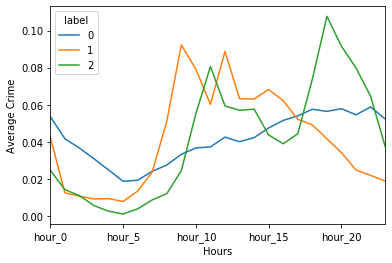

In [21]:
#plot
import matplotlib.pyplot as plt
%matplotlib inline
hT.T.plot()
plt.xlabel("Hours")
plt.ylabel("Average Crime")

### b) Describe the three different hour-of-day trends represented by these three clusters

Cluster 0 stays on par with the other clusters as it has a minimum around hour 5, then this cluster steadily rises throughout the day, constantly increasing until the very end of the day.

Cluster 1 firmly peaks in the middle of the day and tapers off after and before that.

Cluster 2 has a smaller peak in the middle of the day and then goes down before a strong peak towards the end of the day.

### c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories.

In [22]:
#get columns we want
crime3 = data3_[['crime_type', 'label']]
crime3.head()

,crime_type,label
0,ARSON: BY FIRE,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,0
2,ASSAULT: AGGRAVATED: HANDGUN,0
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,0
4,ASSAULT: AGGRAVATED: OTHER FIREARM,0


In [23]:
crime3.dtypes

crime_type    object
label          int32
dtype: object

In [24]:
#to see more broad crime categories
crime3['crime_type'] = crime3['crime_type'].str.split(':', 1).str[0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
crime3.head()

,crime_type,label
0,ARSON,0
1,ASSAULT,0
2,ASSAULT,0
3,ASSAULT,0
4,ASSAULT,0


In [26]:
crime = crime3.groupby(['label'])['crime_type'].value_counts()
crime

label  crime_type                      
0      BATTERY                             12
       ROBBERY                              9
       ASSAULT                              6
       CRIMINAL DAMAGE                      5
       OTHER OFFENSE                        5
       CRIMINAL TRESPASS                    4
       THEFT                                4
       WEAPONS VIOLATION                    4
       BURGLARY                             3
       MOTOR VEHICLE THEFT                  3
       CRIM SEXUAL ASSAULT                  2
       DECEPTIVE PRACTICE                   2
       NARCOTICS                            2
       OFFENSE INVOLVING CHILDREN           2
       SEX OFFENSE                          2
       ARSON                                1
       HOMICIDE                             1
       INTERFERENCE WITH PUBLIC OFFICER     1
       LIQUOR LAW VIOLATION                 1
       STALKING                             1
1      DECEPTIVE PRACTICE               

group 0 has more battery, robbery, and assault
group 1 has more deceptive practive and 'other offense'
group 2 has mainly narcotics crimes

### d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.

In [27]:
data3.columns

Index(['crime_type', 'Category', 'day_Sun', 'day_Mon', 'day_Tue', 'day_Wed',
       'day_Thu', 'day_Fri', 'day_Sat', 'hour_0',
       ...
       'community_area_68', 'community_area_69', 'community_area_70',
       'community_area_71', 'community_area_72', 'community_area_73',
       'community_area_74', 'community_area_75', 'community_area_76',
       'community_area_77'],
      dtype='object', length=110)

In [28]:
#get the columns we want
days = data3_[['day_Sun', 'day_Mon', 'day_Tue', 'day_Wed', 'day_Thu', 'day_Fri', 'day_Sat', 'label']]

In [29]:
days.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,label
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0


In [30]:
d = days.groupby(['label']).mean()
d.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
label,,,,,,,
0,0.146857,0.140419,0.138529,0.135427,0.136949,0.149808,0.152011
1,0.108502,0.150429,0.152455,0.153047,0.153902,0.158629,0.123036
2,0.114714,0.141288,0.160484,0.148855,0.146087,0.156921,0.131651


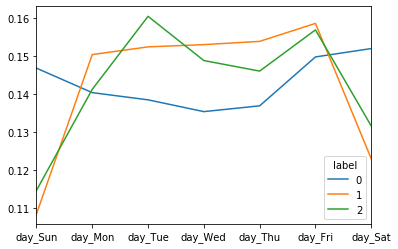

In [31]:
d.T.plot()

no massive differences by day; group 0 goes up on the weekends which is unique, group 1 is minimal during the weekends and pretty steady during the week, and group 2 has a larger peak on Tuesday and Friday and is low on the weekends

### e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. 

In [32]:
pd.set_option('display.max_columns', 500)
data3_.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,community_area_11,community_area_12,community_area_13,community_area_14,community_area_15,community_area_16,community_area_17,community_area_18,community_area_19,community_area_20,community_area_21,community_area_22,community_area_23,community_area_24,community_area_25,community_area_26,community_area_27,community_area_28,community_area_29,community_area_30,community_area_31,community_area_32,community_area_33,community_area_34,community_area_35,community_area_36,community_area_37,community_area_38,community_area_39,community_area_40,community_area_41,community_area_42,community_area_43,community_area_44,community_area_45,community_area_46,community_area_47,community_area_48,community_area_49,community_area_50,community_area_51,community_area_52,community_area_53,community_area_54,community_area_55,community_area_56,community_area_57,community_area_58,community_area_59,community_area_60,community_area_61,community_area_62,community_area_63,community_area_64,community_area_65,community_area_66,community_area_67,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,index,label
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,0.016997,0.016997,0.031161,0.019830,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,0.000000,0.000000,0.002833,0.008499,0.011331,0.008499,0.016997,0.002833,0.048159,0.022663,0.016997,0.028329,0.028329,0.008499,0.079320,0.011331,0.016997,0.011331,0.031161,0.045326,0.031161,0.002833,0.000000,0.002833,0.000000,0.002833,0.005666,0.002833,0.002833,0.002833,0.000000,0.000000,0.011331,0.022663,0.008499,0.011331,0.000000,0.002833,0.048159,0.000000,0.011331,0.008499,0.036827,0.005666,0.002833,0.008499,0.002833,0.022663,0.008499,0.000000,0.033994,0.008499,0.005666,0.005666,0.042493,0.062323,0.042493,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,0.037037,0.025926,0.055556,0.037037,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,0.011111,0.000000,0.000000,0.000000,0.011111,0.007407,0.003704,0.003704,0.033333,0.003704,0.003704,0.007407,0.033333,0.014815,0.070370,0.011111,0.022222,0.025926,0.048148,0.051852,0.011111,0.014815,0.007407,0.003704,0.014815,0.000000,0.000000,0.007407,0.000000,0.011111,0.000000,0.011111,0.059259,0.018519,0.003704,0.029630,0.000000,0.003704,0.044444,0.000000,0.007407,0.003704,0.018519,0.000000,0.003704,0.011111,0.003704,0.011111,0.011111,0.007407,0.003704,0.000000,0.007407,0.000000,0.003704,0.033333,0.011111,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,1,0
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,0.039229,0.033275,0.041331,0.039580,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042,0.009107,0.009457,0.006655,0.0

In [33]:
#columns we want
comm = data3_[["community_area_1",	"community_area_2",	"community_area_3",	"community_area_4",	"community_area_5",	"community_area_6",	"community_area_7",	"community_area_8",	"community_area_9",	"community_area_10",	"community_area_11",	"community_area_12",	"community_area_13",	"community_area_14",	"community_area_15",	"community_area_16",	"community_area_17",	"community_area_18",	"community_area_19",	"community_area_20",	"community_area_21",	"community_area_22",	"community_area_23",	"community_area_24",	"community_area_25",	"community_area_26",	"community_area_27",	"community_area_28",	"community_area_29",	"community_area_30",	"community_area_31",	"community_area_32",	"community_area_33",	"community_area_34",	"community_area_35",	"community_area_36",	"community_area_37",	"community_area_38",	"community_area_39",	"community_area_40",	"community_area_41",	"community_area_42",	"community_area_43",	"community_area_44",	"community_area_45",	"community_area_46",	"community_area_47",	"community_area_48",	"community_area_49",	"community_area_50",	"community_area_51",	"community_area_52",	"community_area_53",	"community_area_54",	"community_area_55",	"community_area_56",	"community_area_57",	"community_area_58",	"community_area_59",	"community_area_60",	"community_area_61",	"community_area_62",	"community_area_63",	"community_area_64",	"community_area_65",	"community_area_66",	"community_area_67",	"community_area_68",	"community_area_69",	"community_area_70",	"community_area_71",	"community_area_72",	"community_area_73","community_area_74","community_area_75","community_area_76","community_area_77","label"]]

In [34]:
comm.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,community_area_11,community_area_12,community_area_13,community_area_14,community_area_15,community_area_16,community_area_17,community_area_18,community_area_19,community_area_20,community_area_21,community_area_22,community_area_23,community_area_24,community_area_25,community_area_26,community_area_27,community_area_28,community_area_29,community_area_30,community_area_31,community_area_32,community_area_33,community_area_34,community_area_35,community_area_36,community_area_37,community_area_38,community_area_39,community_area_40,community_area_41,community_area_42,community_area_43,community_area_44,community_area_45,community_area_46,community_area_47,community_area_48,community_area_49,community_area_50,community_area_51,community_area_52,community_area_53,community_area_54,community_area_55,community_area_56,community_area_57,community_area_58,community_area_59,community_area_60,community_area_61,community_area_62,community_area_63,community_area_64,community_area_65,community_area_66,community_area_67,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,label
0,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,0.000000,0.000000,0.002833,0.008499,0.011331,0.008499,0.016997,0.002833,0.048159,0.022663,0.016997,0.028329,0.028329,0.008499,0.079320,0.011331,0.016997,0.011331,0.031161,0.045326,0.031161,0.002833,0.000000,0.002833,0.000000,0.002833,0.005666,0.002833,0.002833,0.002833,0.000000,0.000000,0.011331,0.022663,0.008499,0.011331,0.000000,0.002833,0.048159,0.000000,0.011331,0.008499,0.036827,0.005666,0.002833,0.008499,0.002833,0.022663,0.008499,0.000000,0.033994,0.008499,0.005666,0.005666,0.042493,0.062323,0.042493,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0
1,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,0.011111,0.000000,0.000000,0.000000,0.011111,0.007407,0.003704,0.003704,0.033333,0.003704,0.003704,0.007407,0.033333,0.014815,0.070370,0.011111,0.022222,0.025926,0.048148,0.051852,0.011111,0.014815,0.007407,0.003704,0.014815,0.000000,0.000000,0.007407,0.000000,0.011111,0.000000,0.011111,0.059259,0.018519,0.003704,0.029630,0.000000,0.003704,0.044444,0.000000,0.007407,0.003704,0.018519,0.000000,0.003704,0.011111,0.003704,0.011111,0.011111,0.007407,0.003704,0.000000,0.007407,0.000000,0.003704,0.033333,0.011111,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,0
2,0.009107,0.009457,0.006655,0.003152,0.002102,0.003152,0.001751,0.010158,0.000,0.002102,0.001051,0.001401,0.002102,0.010508,0.007706,0.007356,0.005954,0.002102,0.024518,0.007356,0.005604,0.016813,0.041331,0.021716,0.073555,0.021366,0.021366,0.013310,0.042032,0.026620,0.016813,0.004203,0.002802,0.002452,0.006655,0.001751,0.006655,0.018564,0.005254,0.013310,0.002802,0.013310,0.031874,0.021016,0.007706,0.025919,0.002452,0.005254,0.038879,0.004553,0.009807,0.005604,0.019615,0.008757,0.001051,0.003503,0.004203,0.015762,0.006305,0.004203,0.035377,0.003152,0.014361,0.002452,0.007005,0.024168,0.040630,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152,0
3,0.014000,0.011000,0.014000,0.003000,0.006000,0.012000,0.004000,0.021000,0.001,0.002000,0.003000,0.001000,0.001000,0.007000,0.013000,0.011000,0.007000,0.005000,0.019000,0.005000,0.003000,0.014000,0.036000,0.016000,0.069000,0.017000,0.025000,0.033000,0.046000,0.022000,0.006000,0.014000,0.009000,0.004000,0.006000,0.005000,0.003000,0.009000,0.008000,0.011000,0.006000,0.017000,0.034000,0.032000,0.002000,0.032000,0.001000,0.008000,0.031000,0.003000,0.008000,0.005000,0.022000,0.006000,0.007000,0.005000,0.003000,0.014000,0.002000,0.01

In [35]:
com = comm.groupby(['label']).mean()
com.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,community_area_11,community_area_12,community_area_13,community_area_14,community_area_15,community_area_16,community_area_17,community_area_18,community_area_19,community_area_20,community_area_21,community_area_22,community_area_23,community_area_24,community_area_25,community_area_26,community_area_27,community_area_28,community_area_29,community_area_30,community_area_31,community_area_32,community_area_33,community_area_34,community_area_35,community_area_36,community_area_37,community_area_38,community_area_39,community_area_40,community_area_41,community_area_42,community_area_43,community_area_44,community_area_45,community_area_46,community_area_47,community_area_48,community_area_49,community_area_50,community_area_51,community_area_52,community_area_53,community_area_54,community_area_55,community_area_56,community_area_57,community_area_58,community_area_59,community_area_60,community_area_61,community_area_62,community_area_63,community_area_64,community_area_65,community_area_66,community_area_67,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.014063,0.012539,0.013563,0.007220,0.004095,0.020895,0.010175,0.027591,0.000680,0.003464,0.003355,0.001654,0.002881,0.009085,0.010051,0.010361,0.006753,0.002163,0.019743,0.007294,0.007590,0.016449,0.029533,0.026321,0.065128,0.024340,0.020537,0.027840,0.037632,0.022576,0.009530,0.021342,0.005762,0.004786,0.009740,0.002244,0.003807,0.011797,0.004644,0.010337,0.004838,0.015701,0.031980,0.024057,0.005474,0.020467,0.001085,0.004876,0.029342,0.004459,0.007731,0.005811,0.015575,0.006775,0.001987,0.006516,0.003583,0.012946,0.005124,0.006758,0.023212,0.003585,0.010298,0.003091,0.008378,0.022887,0.029819,0.026472,0.028997,0.009295,0.029066,0.002842,0.011455,0.001561,0.007094,0.010014,0.007291
1,0.014446,0.014380,0.016437,0.010941,0.007502,0.024766,0.018054,0.053912,0.002169,0.007858,0.004763,0.003016,0.004261,0.009573,0.014943,0.012303,0.007067,0.002193,0.016228,0.006727,0.008588,0.018966,0.023414,0.026575,0.048565,0.013271,0.019647,0.039949,0.025529,0.015190,0.009051,0.051680,0.008981,0.003757,0.011673,0.001771,0.003917,0.011583,0.004641,0.008284,0.008651,0.015889,0.024071,0.020597,0.004489,0.014814,0.001636,0.005418,0.023622,0.005173,0.006675,0.007695,0.011893,0.002365,0.002113,0.008502,0.003312,0.009799,0.003825,0.006601,0.018165,0.004207,0.007772,0.005176,0.007603,0.018737,0.019564,0.017873,0.020703,0.010150,0.023909,0.005234,0.011028,0.004348,0.009446,0.009696,0.012677
2,0.007933,0.005855,0.007573,0.002209,0.001145,0.006267,0.001626,0.014067,0.000393,0.001321,0.000485,0.000397,0.001741,0.002334,0.003611,0.003488,0.001317,0.001076,0.008777,0.004704,0.002634,0.006024,0.066626,0.005023,0.177602,0.081675,0.049040,0.015941,0.068311,0.012204,0.003292,0.009864,0.004525,0.003680,0.004963,0.000293,0.003105,0.005045,0.001060,0.008733,0.001166,0.013709,0.020641,0.026674,0.004479,0.021389,0.001431,0.003275,0.036399,0.002335,0.008400,0.002396,0.017824,0.003823,0.000305,0.005045,0.000938,0.008587,0.001221,0.002517,0.017214,0.000935,0.004446,0.001029,0.001877,0.020811,0.044557,0.037812,0.027129,0.002288,0.032473,0.000902,0.009801,0.000580,0.007220,0.000915,0.001499


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


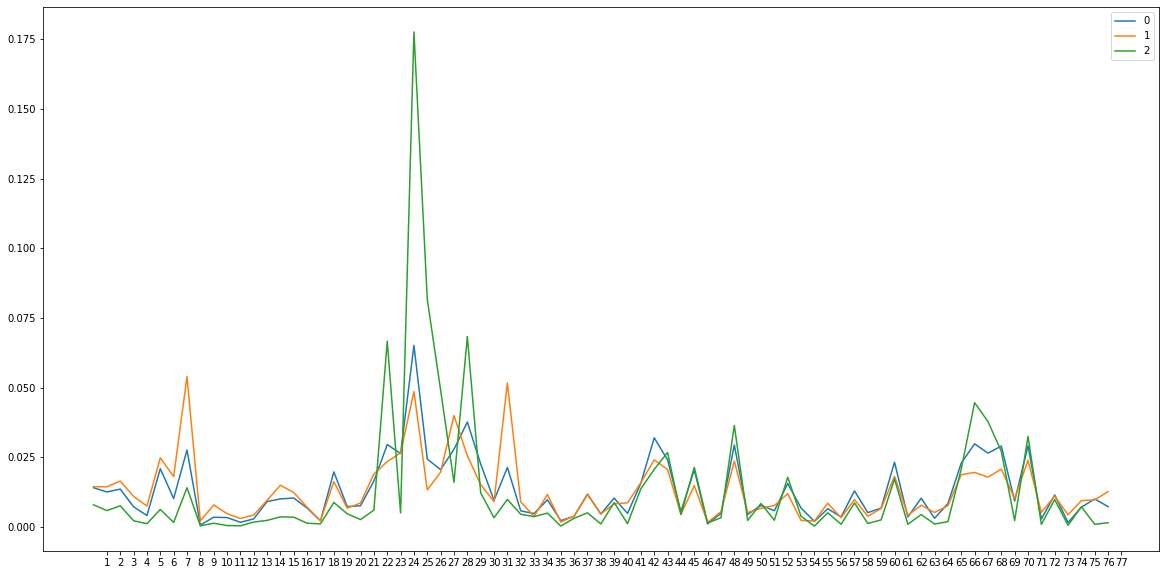

In [36]:
neigh = range(1,78)

#fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
plt.plot(com.T)
ax = plt.subplot()
ax.set_xticks(neigh)
ax.set_xticklabels(neigh)
plt.legend([0,1,2])


In [37]:
data_comm = pd.read_csv("HW3Q3_2.csv")
data_comm.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


In [38]:
#descriptive statistics for comparison across clusters
data_comm.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,77.000000,7.700000e+01,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.163753e+06,1.884761e+06,4.923377,21.766234,15.372727,20.341558,35.746753,25563.168831,12.442935,3262.246753
std,22.371857,1.891460e+04,3.595371e+04,3.682887,11.529957,7.543412,11.823152,7.327716,15293.098259,5.837773,2790.716590
min,1.000000,1.106851e+06,1.818033e+06,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,4.427736,283.000000
25%,20.000000,1.151302e+06,1.857000e+06,2.300000,13.200000,9.200000,11.800000,32.000000,15754.000000,8.600422,1229.000000
50%,39.000000,1.164978e+06,1.881505e+06,3.800000,18.900000,13.900000,18.500000,38.100000,21323.000000,10.255709,2296.000000
75%,58.000000,1.178008e+06,1.916572e+06,6.800000,29.200000,20.000000,26.600000,40.500000,28887.000000,15.839488,4604.000000
max,77.000000,1.202111e+06,1.947667e+06,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,29.411765,15719.000000


In [39]:
#cluster 0 descriptive statistics
group0 = data_comm.iloc[[7, 24, 42, 66], :]
group0.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,4.00000,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,35.75000,1.168613e+06,1.881947e+06,3.950000,26.750000,21.375000,16.800000,34.225000,33835.250000,18.049044,9920.250000
std,25.26361,2.124352e+04,2.630173e+04,1.980741,9.533974,11.846343,10.959623,8.015558,36705.484298,3.411891,4114.171555
min,8.00000,1.140839e+06,1.856742e+06,1.900000,12.900000,7.000000,2.500000,22.600000,11317.000000,14.188517,6442.000000
25%,20.75000,1.160056e+06,1.860522e+06,2.575000,24.675000,16.750000,11.125000,32.425000,14797.000000,16.354999,7365.250000
50%,34.00000,1.170987e+06,1.882478e+06,3.800000,29.850000,21.300000,19.200000,36.800000,17677.500000,17.809521,8760.000000
75%,49.00000,1.179544e+06,1.903903e+06,5.175000,31.925000,25.925000,24.875000,38.600000,36715.750000,19.503566,11315.000000
max,67.00000,1.191640e+06,1.906089e+06,6.300000,34.400000,35.900000,26.300000,40.700000,88669.000000,22.388616,15719.000000


Group 0 is characterized by having more unemployment, less education and more crime than the average. They have a higher mean incoe, but a lower median so there are some high outliers pulling up that mean.

In [40]:
data_comm.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,77.000000,7.700000e+01,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.163753e+06,1.884761e+06,4.923377,21.766234,15.372727,20.341558,35.746753,25563.168831,12.442935,3262.246753
std,22.371857,1.891460e+04,3.595371e+04,3.682887,11.529957,7.543412,11.823152,7.327716,15293.098259,5.837773,2790.716590
min,1.000000,1.106851e+06,1.818033e+06,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,4.427736,283.000000
25%,20.000000,1.151302e+06,1.857000e+06,2.300000,13.200000,9.200000,11.800000,32.000000,15754.000000,8.600422,1229.000000
50%,39.000000,1.164978e+06,1.881505e+06,3.800000,18.900000,13.900000,18.500000,38.100000,21323.000000,10.255709,2296.000000
75%,58.000000,1.178008e+06,1.916572e+06,6.800000,29.200000,20.000000,26.600000,40.500000,28887.000000,15.839488,4604.000000
max,77.000000,1.202111e+06,1.947667e+06,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,29.411765,15719.000000


In [41]:
#cluster 1 descriptive statistics
group1 = data_comm.iloc[[7, 14, 31], :]
group1.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,3.000000,3.000000e+00,3.000000e+00,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,18.333333,1.163977e+06,1.910538e+06,2.5,13.066667,8.433333,8.300000,23.366667,59510.333333,16.563851,7114.333333
std,12.342339,2.073091e+04,1.349342e+04,1.4,1.556706,3.666515,9.531002,10.271482,32585.654916,8.333749,3607.676445
min,8.000000,1.140044e+06,1.899831e+06,1.5,11.600000,5.700000,2.500000,13.500000,24336.000000,7.985313,3025.000000
25%,11.500000,1.157778e+06,1.902960e+06,1.7,12.250000,6.350000,2.800000,18.050000,44931.000000,12.531236,5748.000000
50%,15.000000,1.175512e+06,1.906089e+06,1.9,12.900000,7.000000,3.100000,22.600000,65526.000000,17.077160,8471.000000
75%,23.500000,1.175943e+06,1.915892e+06,3.0,13.800000,9.800000,11.200000,28.300000,77097.500000,20.853120,9159.000000
max,32.000000,1.176374e+06,1.925694e+06,4.1,14.700000,12.600000,19.300000,34.000000,88669.000000,24.629080,9847.000000


Group 1 has lower unemployment levels, better education numbers and higher income levels, however they have more crime when compared to Chicago as a whole. There are also more middle ages and presumably working population people in this group.

In [42]:
data_comm.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,77.000000,7.700000e+01,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.163753e+06,1.884761e+06,4.923377,21.766234,15.372727,20.341558,35.746753,25563.168831,12.442935,3262.246753
std,22.371857,1.891460e+04,3.595371e+04,3.682887,11.529957,7.543412,11.823152,7.327716,15293.098259,5.837773,2790.716590
min,1.000000,1.106851e+06,1.818033e+06,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,4.427736,283.000000
25%,20.000000,1.151302e+06,1.857000e+06,2.300000,13.200000,9.200000,11.800000,32.000000,15754.000000,8.600422,1229.000000
50%,39.000000,1.164978e+06,1.881505e+06,3.800000,18.900000,13.900000,18.500000,38.100000,21323.000000,10.255709,2296.000000
75%,58.000000,1.178008e+06,1.916572e+06,6.800000,29.200000,20.000000,26.600000,40.500000,28887.000000,15.839488,4604.000000
max,77.000000,1.202111e+06,1.947667e+06,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,29.411765,15719.000000


In [43]:
#cluster 2 descriptive statistics
group2 = data_comm.iloc[[22, 24, 25, 28, 66, 67], :]
group2.describe()

,Community Area Number,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
count,6.000000,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,39.666667,1.155285e+06,1.887516e+06,7.750000,38.050000,25.133333,27.783333,40.900000,12651.833333,21.870250,8145.833333
std,21.648711,1.170857e+04,2.046885e+04,3.973789,6.808451,6.447222,4.074023,2.471437,1891.932072,6.070787,3850.324008
min,23.000000,1.140839e+06,1.861782e+06,3.800000,28.600000,17.300000,24.400000,37.900000,10934.000000,14.188517,5340.000000
25%,25.250000,1.149370e+06,1.869538e+06,5.175000,34.025000,21.550000,24.950000,38.675000,11459.750000,17.351661,5944.750000
50%,27.500000,1.151761e+06,1.895677e+06,6.850000,38.050000,24.200000,26.950000,41.600000,11961.000000,22.138397,6982.000000
75%,57.500000,1.162922e+06,1.902077e+06,8.900000,42.750000,27.450000,28.275000,42.650000,13344.250000,26.225856,7935.250000
max,68.000000,1.172131e+06,1.906926e+06,14.800000,46.600000,35.900000,35.400000,43.600000,15957.000000,29.411765,15719.000000


Group 2 appears to be a more impoverished area with worse crime than the whole, poverty levels are higher and education and income levels are lower compared to the city as a whole. The population is also disproportionate to a younger and older community (more people younger than 18 and older than 64).

### f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes?

In [44]:
#get columns we want
fbi = data3_[['Category', 'label']]

In [45]:
fbi.head()

,Category,label
0,P1P,0
1,P2,0
2,P1V,0
3,P1V,0
4,P1V,0


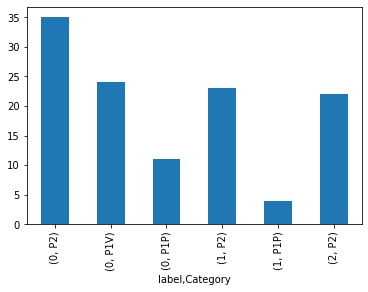

In [46]:
#visualize crime categories by cluster
fbi1 = fbi.groupby(['label'])['Category'].value_counts()
fbi1.plot(kind = 'bar')

All groups have P2 as the dominant category - group 2 has only P2 and group 1 has mostly P2 with a few in the P1P category. Group 0 also has mostly P2 but not as much of a proportion compared to other groups and categories. It also has a high amount of P1V and a few in the P1P category.

### g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings.

In [47]:
#get data to cluster on
dayofweek = data3[['day_Sun', 'day_Mon', 'day_Tue', 'day_Wed', 'day_Thu', 'day_Fri', 'day_Sat']]
dayofweek.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275


In [48]:
#K means clustering through a range up to 6 since there are 7 days in a week, fit each cluster and get the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(dayofweek)
    #report average Silhouette score
    silhouette_avg = silhouette_score(dayofweek, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.2349670398022403
For n_clusters =3, the average silhouette_score is :0.23285930522647585
For n_clusters =4, the average silhouette_score is :0.21069067164506367
For n_clusters =5, the average silhouette_score is :0.1532235141735237
For n_clusters =6, the average silhouette_score is :0.17024288003160884
For n_clusters =7, the average silhouette_score is :0.173353484563612


From this we can see that 2 is the optimal amount of clusters, I'd guess weekday crimes and weekend crimes are the clusters

In [49]:
#using the optimal cluster of 2 we go further
kmdays = KMeans(random_state=999,n_clusters=2)
rr=kmdays.fit(dayofweek)

In [50]:
rr.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int32)

In [51]:
clust1={data3.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}

In [52]:
rrr=pd.DataFrame({'index':data3.index, 'label':rr.labels_})

In [53]:
data3_1 = data3.merge(rrr, how = 'outer', left_index = True, right_index = True)
data3_1.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,community_area_11,community_area_12,community_area_13,community_area_14,community_area_15,community_area_16,community_area_17,community_area_18,community_area_19,community_area_20,community_area_21,community_area_22,community_area_23,community_area_24,community_area_25,community_area_26,community_area_27,community_area_28,community_area_29,community_area_30,community_area_31,community_area_32,community_area_33,community_area_34,community_area_35,community_area_36,community_area_37,community_area_38,community_area_39,community_area_40,community_area_41,community_area_42,community_area_43,community_area_44,community_area_45,community_area_46,community_area_47,community_area_48,community_area_49,community_area_50,community_area_51,community_area_52,community_area_53,community_area_54,community_area_55,community_area_56,community_area_57,community_area_58,community_area_59,community_area_60,community_area_61,community_area_62,community_area_63,community_area_64,community_area_65,community_area_66,community_area_67,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,index,label
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,0.016997,0.016997,0.031161,0.019830,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,0.000000,0.000000,0.002833,0.008499,0.011331,0.008499,0.016997,0.002833,0.048159,0.022663,0.016997,0.028329,0.028329,0.008499,0.079320,0.011331,0.016997,0.011331,0.031161,0.045326,0.031161,0.002833,0.000000,0.002833,0.000000,0.002833,0.005666,0.002833,0.002833,0.002833,0.000000,0.000000,0.011331,0.022663,0.008499,0.011331,0.000000,0.002833,0.048159,0.000000,0.011331,0.008499,0.036827,0.005666,0.002833,0.008499,0.002833,0.022663,0.008499,0.000000,0.033994,0.008499,0.005666,0.005666,0.042493,0.062323,0.042493,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,0.037037,0.025926,0.055556,0.037037,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,0.011111,0.000000,0.000000,0.000000,0.011111,0.007407,0.003704,0.003704,0.033333,0.003704,0.003704,0.007407,0.033333,0.014815,0.070370,0.011111,0.022222,0.025926,0.048148,0.051852,0.011111,0.014815,0.007407,0.003704,0.014815,0.000000,0.000000,0.007407,0.000000,0.011111,0.000000,0.011111,0.059259,0.018519,0.003704,0.029630,0.000000,0.003704,0.044444,0.000000,0.007407,0.003704,0.018519,0.000000,0.003704,0.011111,0.003704,0.011111,0.011111,0.007407,0.003704,0.000000,0.007407,0.000000,0.003704,0.033333,0.011111,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,1,0
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,0.039229,0.033275,0.041331,0.039580,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042,0.009107,0.009457,0.006655,0.0

In [54]:
#see how many elements in cluster 0
df0 = data3_1[data3_1['label'] == 0]
df0.shape

(56, 112)

cluster 0 has 56 elements

In [55]:
#see how many elements in cluster 1
df1 = data3_1[data3_1['label'] == 1]
df1.shape

(63, 112)

cluster 1 has 63 elements

In [56]:
days_ = dayofweek.merge(rrr, how = 'outer', left_index = True, right_index = True)

In [57]:
days_.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,index,label
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0,0
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,1,0
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,2,0
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,3,0
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,4,0


In [58]:
d = days_.drop(['index'], axis = 1)

In [59]:
dT = d.groupby(['label']).mean()

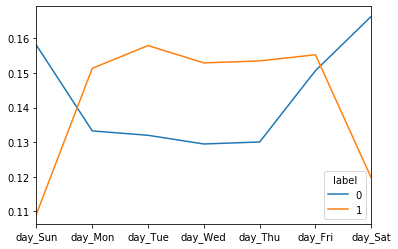

In [60]:
%matplotlib inline
dT.T.plot()

This confirms my guess that weekends and weekdays are the clusters with Friday being fairly even for both

In [61]:
# Use Gaussian mixture models to do the same as the k means above, cycle through the range of 7 and get the silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7]
from sklearn.mixture import GaussianMixture
for n_clusters in range_n_clusters: #try different numbers of clusters
    gmm = GaussianMixture(n_components=n_clusters,random_state=100)
    labels = gmm.fit_predict(dayofweek)
    silhouette_avg = silhouette_score(dayofweek, labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))


For n_clusters =2, the average silhouette_score is :0.25672726757004694
For n_clusters =3, the average silhouette_score is :0.2201383187190381
For n_clusters =4, the average silhouette_score is :0.22703952720765533
For n_clusters =5, the average silhouette_score is :0.22818135475190848
For n_clusters =6, the average silhouette_score is :0.13190064771632148
For n_clusters =7, the average silhouette_score is :0.12456829806547587


We get 2 clusters from Gaussian mixture as well

In [62]:
#using optimal cluster of 2 we perform further analysis
gmm = GaussianMixture(n_components=2,random_state=100)
labels = gmm.fit_predict(dayofweek)

In [63]:
labels

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1])

In [64]:
clust2={data3.index[i]:labels[i] for i in range(len(labels))}

rgm=pd.DataFrame({'index':data3.index, 'label':labels})

data3_2 = data3.merge(rgm, how = 'outer', left_index = True, right_index = True)
data3_2.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,community_area_11,community_area_12,community_area_13,community_area_14,community_area_15,community_area_16,community_area_17,community_area_18,community_area_19,community_area_20,community_area_21,community_area_22,community_area_23,community_area_24,community_area_25,community_area_26,community_area_27,community_area_28,community_area_29,community_area_30,community_area_31,community_area_32,community_area_33,community_area_34,community_area_35,community_area_36,community_area_37,community_area_38,community_area_39,community_area_40,community_area_41,community_area_42,community_area_43,community_area_44,community_area_45,community_area_46,community_area_47,community_area_48,community_area_49,community_area_50,community_area_51,community_area_52,community_area_53,community_area_54,community_area_55,community_area_56,community_area_57,community_area_58,community_area_59,community_area_60,community_area_61,community_area_62,community_area_63,community_area_64,community_area_65,community_area_66,community_area_67,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,index,label
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,0.016997,0.016997,0.031161,0.019830,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,0.000000,0.000000,0.002833,0.008499,0.011331,0.008499,0.016997,0.002833,0.048159,0.022663,0.016997,0.028329,0.028329,0.008499,0.079320,0.011331,0.016997,0.011331,0.031161,0.045326,0.031161,0.002833,0.000000,0.002833,0.000000,0.002833,0.005666,0.002833,0.002833,0.002833,0.000000,0.000000,0.011331,0.022663,0.008499,0.011331,0.000000,0.002833,0.048159,0.000000,0.011331,0.008499,0.036827,0.005666,0.002833,0.008499,0.002833,0.022663,0.008499,0.000000,0.033994,0.008499,0.005666,0.005666,0.042493,0.062323,0.042493,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,0.037037,0.025926,0.055556,0.037037,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,0.011111,0.000000,0.000000,0.000000,0.011111,0.007407,0.003704,0.003704,0.033333,0.003704,0.003704,0.007407,0.033333,0.014815,0.070370,0.011111,0.022222,0.025926,0.048148,0.051852,0.011111,0.014815,0.007407,0.003704,0.014815,0.000000,0.000000,0.007407,0.000000,0.011111,0.000000,0.011111,0.059259,0.018519,0.003704,0.029630,0.000000,0.003704,0.044444,0.000000,0.007407,0.003704,0.018519,0.000000,0.003704,0.011111,0.003704,0.011111,0.011111,0.007407,0.003704,0.000000,0.007407,0.000000,0.003704,0.033333,0.011111,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,1,0
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,0.039229,0.033275,0.041331,0.039580,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042,0.009107,0.009457,0.006655,0.0

In [65]:
dfgm0 = data3_2[data3_2['label'] == 0]
dfgm0.shape

(89, 112)

group 0 has 89 elements

In [66]:
dfgm1 = data3_2[data3_2['label'] == 1]
dfgm1.shape

(30, 112)

group 1 has 30 elements

In [67]:
days_1 = dayofweek.merge(rgm, how = 'outer', left_index = True, right_index = True)

days_1.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,index,label
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0,0
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,1,0
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,2,0
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,3,0
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,4,1


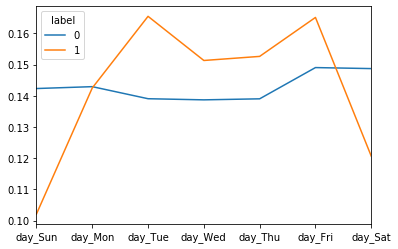

In [68]:
g = days_1.drop(['index'], axis = 1)

gT = g.groupby(['label']).mean()

%matplotlib inline
gT.T.plot()

Similar to KMeans, we see a weekday cluster and a weaker weekend cluster as it is mostly stays flat throughout

In [69]:
#single link clustering, clycle through range to find optimal silhouette score
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
range_n_clusters = range(2,8)
Z = linkage(dayofweek, 'single')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(dayofweek, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.6377648080667613
For n_clusters = 3, the average silhouette_score is : 0.5568477382969328
For n_clusters = 4, the average silhouette_score is : 0.40557775075981567
For n_clusters = 5, the average silhouette_score is : 0.38770381887486693
For n_clusters = 6, the average silhouette_score is : 0.39007619510221914
For n_clusters = 7, the average silhouette_score is : 0.34621844820394376


Single Link clustering also gives us 2 clusters

In [70]:
#using optimal clustering of 2 we do further analysis
Z = linkage(dayofweek, 'single')

In [71]:
cluster_labels=fcluster(Z, 2, criterion='maxclust')    

In [72]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [73]:
clust3={data3.index[i]:cluster_labels[i] for i in range(len(cluster_labels))}

rsl=pd.DataFrame({'index':data3.index, 'label':cluster_labels})

data3_3 = data3.merge(rsl, how = 'outer', left_index = True, right_index = True)
data3_3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,community_area_11,community_area_12,community_area_13,community_area_14,community_area_15,community_area_16,community_area_17,community_area_18,community_area_19,community_area_20,community_area_21,community_area_22,community_area_23,community_area_24,community_area_25,community_area_26,community_area_27,community_area_28,community_area_29,community_area_30,community_area_31,community_area_32,community_area_33,community_area_34,community_area_35,community_area_36,community_area_37,community_area_38,community_area_39,community_area_40,community_area_41,community_area_42,community_area_43,community_area_44,community_area_45,community_area_46,community_area_47,community_area_48,community_area_49,community_area_50,community_area_51,community_area_52,community_area_53,community_area_54,community_area_55,community_area_56,community_area_57,community_area_58,community_area_59,community_area_60,community_area_61,community_area_62,community_area_63,community_area_64,community_area_65,community_area_66,community_area_67,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,index,label
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,0.016997,0.016997,0.031161,0.019830,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,0.000000,0.000000,0.002833,0.008499,0.011331,0.008499,0.016997,0.002833,0.048159,0.022663,0.016997,0.028329,0.028329,0.008499,0.079320,0.011331,0.016997,0.011331,0.031161,0.045326,0.031161,0.002833,0.000000,0.002833,0.000000,0.002833,0.005666,0.002833,0.002833,0.002833,0.000000,0.000000,0.011331,0.022663,0.008499,0.011331,0.000000,0.002833,0.048159,0.000000,0.011331,0.008499,0.036827,0.005666,0.002833,0.008499,0.002833,0.022663,0.008499,0.000000,0.033994,0.008499,0.005666,0.005666,0.042493,0.062323,0.042493,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0,1
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,0.037037,0.025926,0.055556,0.037037,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,0.011111,0.000000,0.000000,0.000000,0.011111,0.007407,0.003704,0.003704,0.033333,0.003704,0.003704,0.007407,0.033333,0.014815,0.070370,0.011111,0.022222,0.025926,0.048148,0.051852,0.011111,0.014815,0.007407,0.003704,0.014815,0.000000,0.000000,0.007407,0.000000,0.011111,0.000000,0.011111,0.059259,0.018519,0.003704,0.029630,0.000000,0.003704,0.044444,0.000000,0.007407,0.003704,0.018519,0.000000,0.003704,0.011111,0.003704,0.011111,0.011111,0.007407,0.003704,0.000000,0.007407,0.000000,0.003704,0.033333,0.011111,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,1,1
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,0.039229,0.033275,0.041331,0.039580,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042,0.009107,0.009457,0.006655,0.0

In [74]:
dfsl0 = data3_3[data3_3['label'] == 1]
dfsl0.shape

(118, 112)

this has all but 1 elements

In [75]:
dfsl1 = data3_3[data3_3['label'] == 2]
dfsl1.shape

(1, 112)

this only contains 1 elements

In [76]:
days_2 = dayofweek.merge(rsl, how = 'outer', left_index = True, right_index = True)

days_2.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,index,label
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0,1
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,1,1
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,2,1
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,3,1
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,4,1


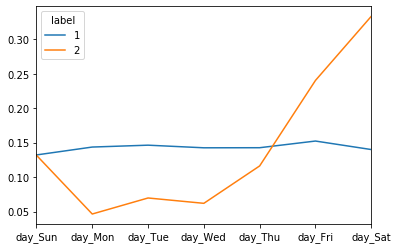

In [77]:
s = days_2.drop(['index'], axis = 1)

sT = s.groupby(['label']).mean()

%matplotlib inline
sT.T.plot()

group 1 stays consistent throughout the week while group 2 spikes on Friday and Saturday

In [78]:
#complete link clustering through the range to find optimal silhouette score
range_n_clusters = range(2,8)
C = linkage(dayofweek, 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(C, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(dayofweek, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.6100646113547024
For n_clusters = 3, the average silhouette_score is : 0.1726871814656612
For n_clusters = 4, the average silhouette_score is : 0.19215169374768615
For n_clusters = 5, the average silhouette_score is : 0.15025207822499773
For n_clusters = 6, the average silhouette_score is : 0.15229681572228088
For n_clusters = 7, the average silhouette_score is : 0.14926267616109445


Lastly, complete Link gives us 2 clusters, like the others

In [79]:
#using optimal clustering of 2 we do further analysis
Z = linkage(dayofweek, 'complete')
cluster_labels=fcluster(Z, 2, criterion='maxclust')    

In [80]:
clust3={data3.index[i]:cluster_labels[i] for i in range(len(cluster_labels))}

In [81]:
rcl=pd.DataFrame({'index':data3.index, 'label':cluster_labels})

In [82]:
data3_4 = data3.merge(rcl, how = 'outer', left_index = True, right_index = True)
data3_4.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,community_area_11,community_area_12,community_area_13,community_area_14,community_area_15,community_area_16,community_area_17,community_area_18,community_area_19,community_area_20,community_area_21,community_area_22,community_area_23,community_area_24,community_area_25,community_area_26,community_area_27,community_area_28,community_area_29,community_area_30,community_area_31,community_area_32,community_area_33,community_area_34,community_area_35,community_area_36,community_area_37,community_area_38,community_area_39,community_area_40,community_area_41,community_area_42,community_area_43,community_area_44,community_area_45,community_area_46,community_area_47,community_area_48,community_area_49,community_area_50,community_area_51,community_area_52,community_area_53,community_area_54,community_area_55,community_area_56,community_area_57,community_area_58,community_area_59,community_area_60,community_area_61,community_area_62,community_area_63,community_area_64,community_area_65,community_area_66,community_area_67,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,index,label
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,0.016997,0.016997,0.031161,0.019830,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,0.000000,0.000000,0.002833,0.008499,0.011331,0.008499,0.016997,0.002833,0.048159,0.022663,0.016997,0.028329,0.028329,0.008499,0.079320,0.011331,0.016997,0.011331,0.031161,0.045326,0.031161,0.002833,0.000000,0.002833,0.000000,0.002833,0.005666,0.002833,0.002833,0.002833,0.000000,0.000000,0.011331,0.022663,0.008499,0.011331,0.000000,0.002833,0.048159,0.000000,0.011331,0.008499,0.036827,0.005666,0.002833,0.008499,0.002833,0.022663,0.008499,0.000000,0.033994,0.008499,0.005666,0.005666,0.042493,0.062323,0.042493,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0,2
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,0.037037,0.025926,0.055556,0.037037,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,0.011111,0.000000,0.000000,0.000000,0.011111,0.007407,0.003704,0.003704,0.033333,0.003704,0.003704,0.007407,0.033333,0.014815,0.070370,0.011111,0.022222,0.025926,0.048148,0.051852,0.011111,0.014815,0.007407,0.003704,0.014815,0.000000,0.000000,0.007407,0.000000,0.011111,0.000000,0.011111,0.059259,0.018519,0.003704,0.029630,0.000000,0.003704,0.044444,0.000000,0.007407,0.003704,0.018519,0.000000,0.003704,0.011111,0.003704,0.011111,0.011111,0.007407,0.003704,0.000000,0.007407,0.000000,0.003704,0.033333,0.011111,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,1,2
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,0.039229,0.033275,0.041331,0.039580,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042,0.009107,0.009457,0.006655,0.0

In [83]:
dfcl0 = data3_4[data3_4['label'] == 1]
dfcl0.shape

(2, 112)

Group 1 has 2 elements

In [84]:
dfcl1 = data3_4[data3_4['label'] == 2]
dfcl1.shape

(117, 112)

Group 2 has all but 2 elements

In [85]:
days_1 = dayofweek.merge(rcl, how = 'outer', left_index = True, right_index = True)

days_1.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,index,label
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0,2
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,1,2
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,2,2
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,3,2
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,4,2


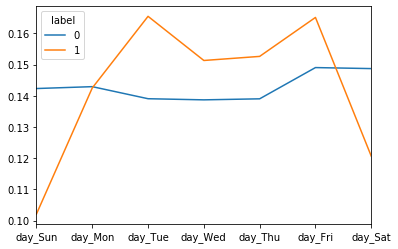

In [86]:
c = days_1.drop(['index'], axis = 1)

cT = g.groupby(['label']).mean()

%matplotlib inline
cT.T.plot()

Group 1 stays pretty constant throughout the weeks while group 2 peaks during the week days